# Load du jeu de données

### Conversion du COCO JSON vers YOLO

In [ ]:
import json
from collections import defaultdict
from tqdm import tqdm
from ultralytics import YOLO
import os
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt
from typing import Union
from utils import coco_json_to_yolo, Visualization

Jeu de données disponible sur le lien suivant : https://universe.roboflow.com/idir-sadaoui-qgzta/butterfly-smcqg

Annotation effectué avec Roboflow, Object Segmentation, avec la classe : {0: Butterfly}.

Export au format COCO JSON.

In [6]:
coco_json_to_yolo(json_file   = "./annotations/valid_annotations.coco.json",
                  output_path = "./valid/labels") # ou "./train_annotations.coco.json" & "./train/labels"

71it [00:00, 672.20it/s]

Conversion terminée ✓


### Visualisation du jeu de données : Images et labels 

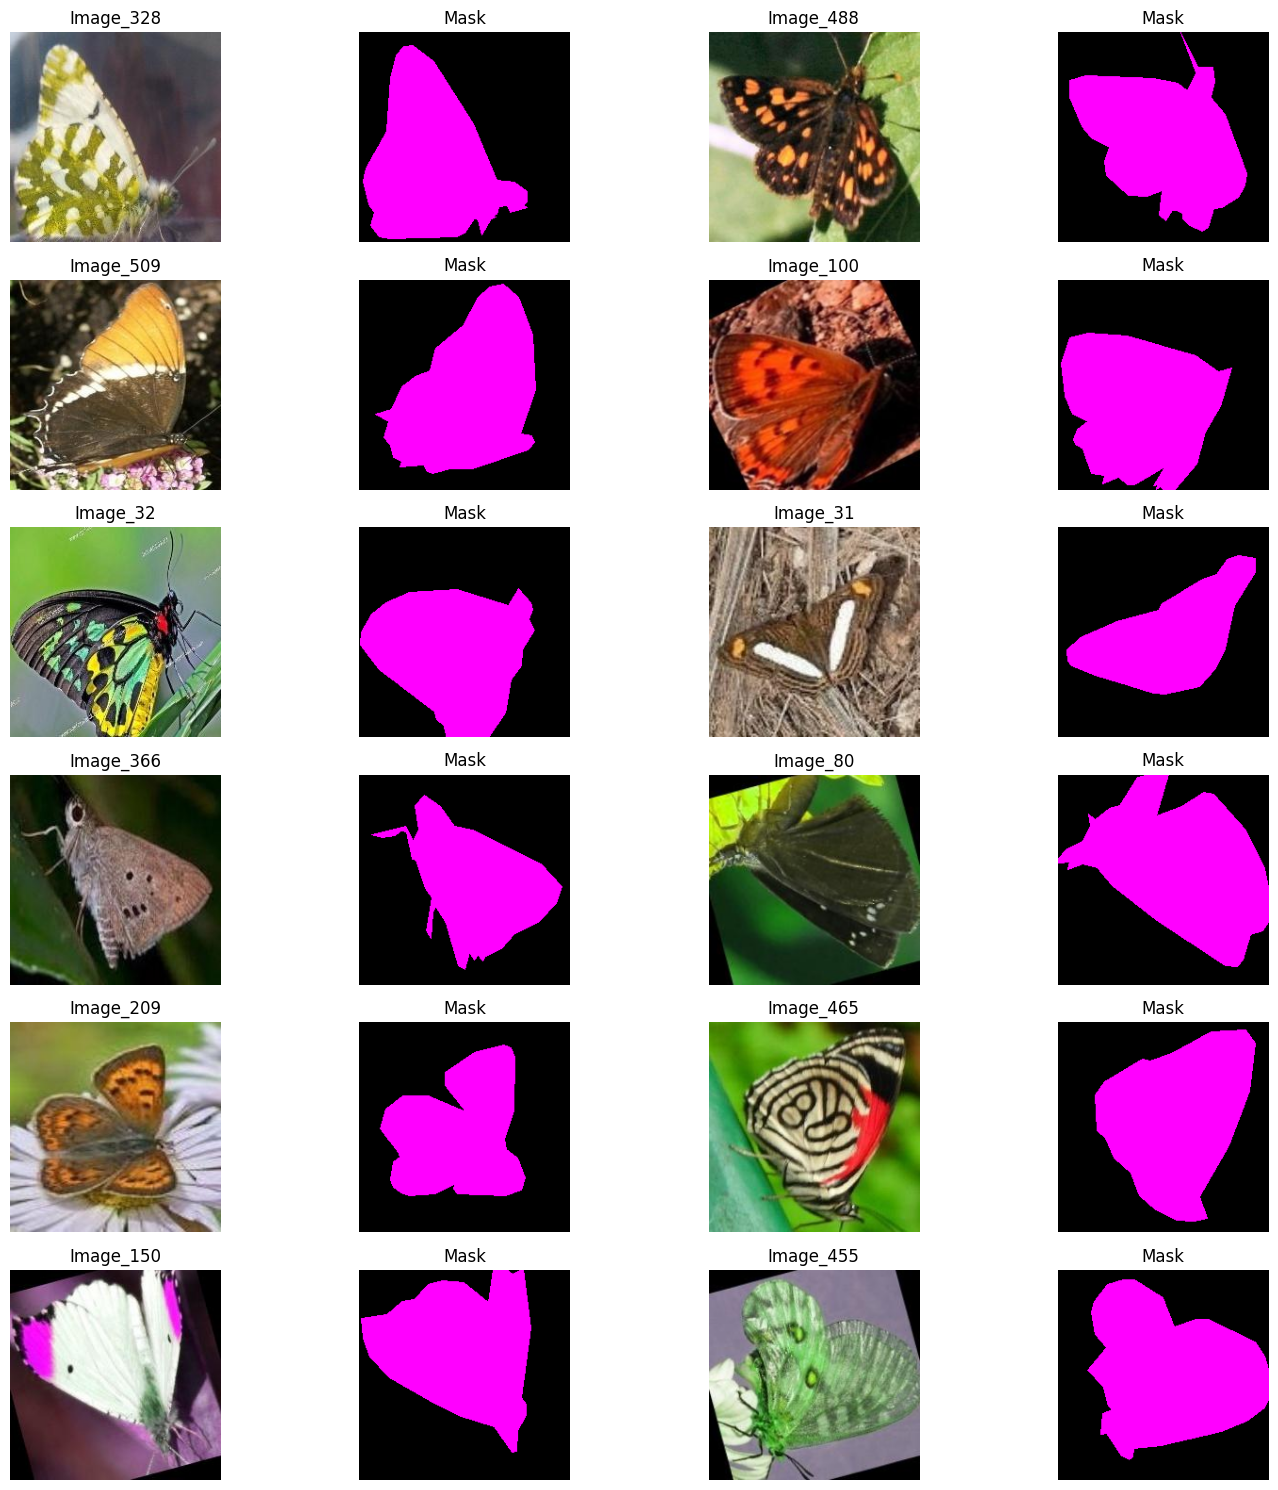

In [117]:
path = "./train/images"
images = os.listdir(path)
nombre_images = 12
rd = [random.randint(0, len(images)-1) for _ in range(nombre_images)]
images_selectionnees = [images[i] for i in rd]

Visualization(images_abs_path = [os.path.join(path,images_selectionnees[i]) for i in range(len(rd))],
              predictions = False)

# Entraînement

In [ ]:
model = YOLO('./weights/yolov8n-seg.pt')

100%|██████████| 6.73M/6.73M [00:00<00:00, 73.7MB/s]


In [ ]:
results = model.train(data='data.yaml', epochs=400, imgsz=224)

Entraînement effectué sur Google Colab avec un GPU T4.

### Export du modèle

In [ ]:
model.export("./weights/butterfly_seg.pt")

# Prédictions

### Load du modèle

In [3]:
model = YOLO("./weights/butterfly_seg.pt")

### Visualisation des prédictions : Images et Mask

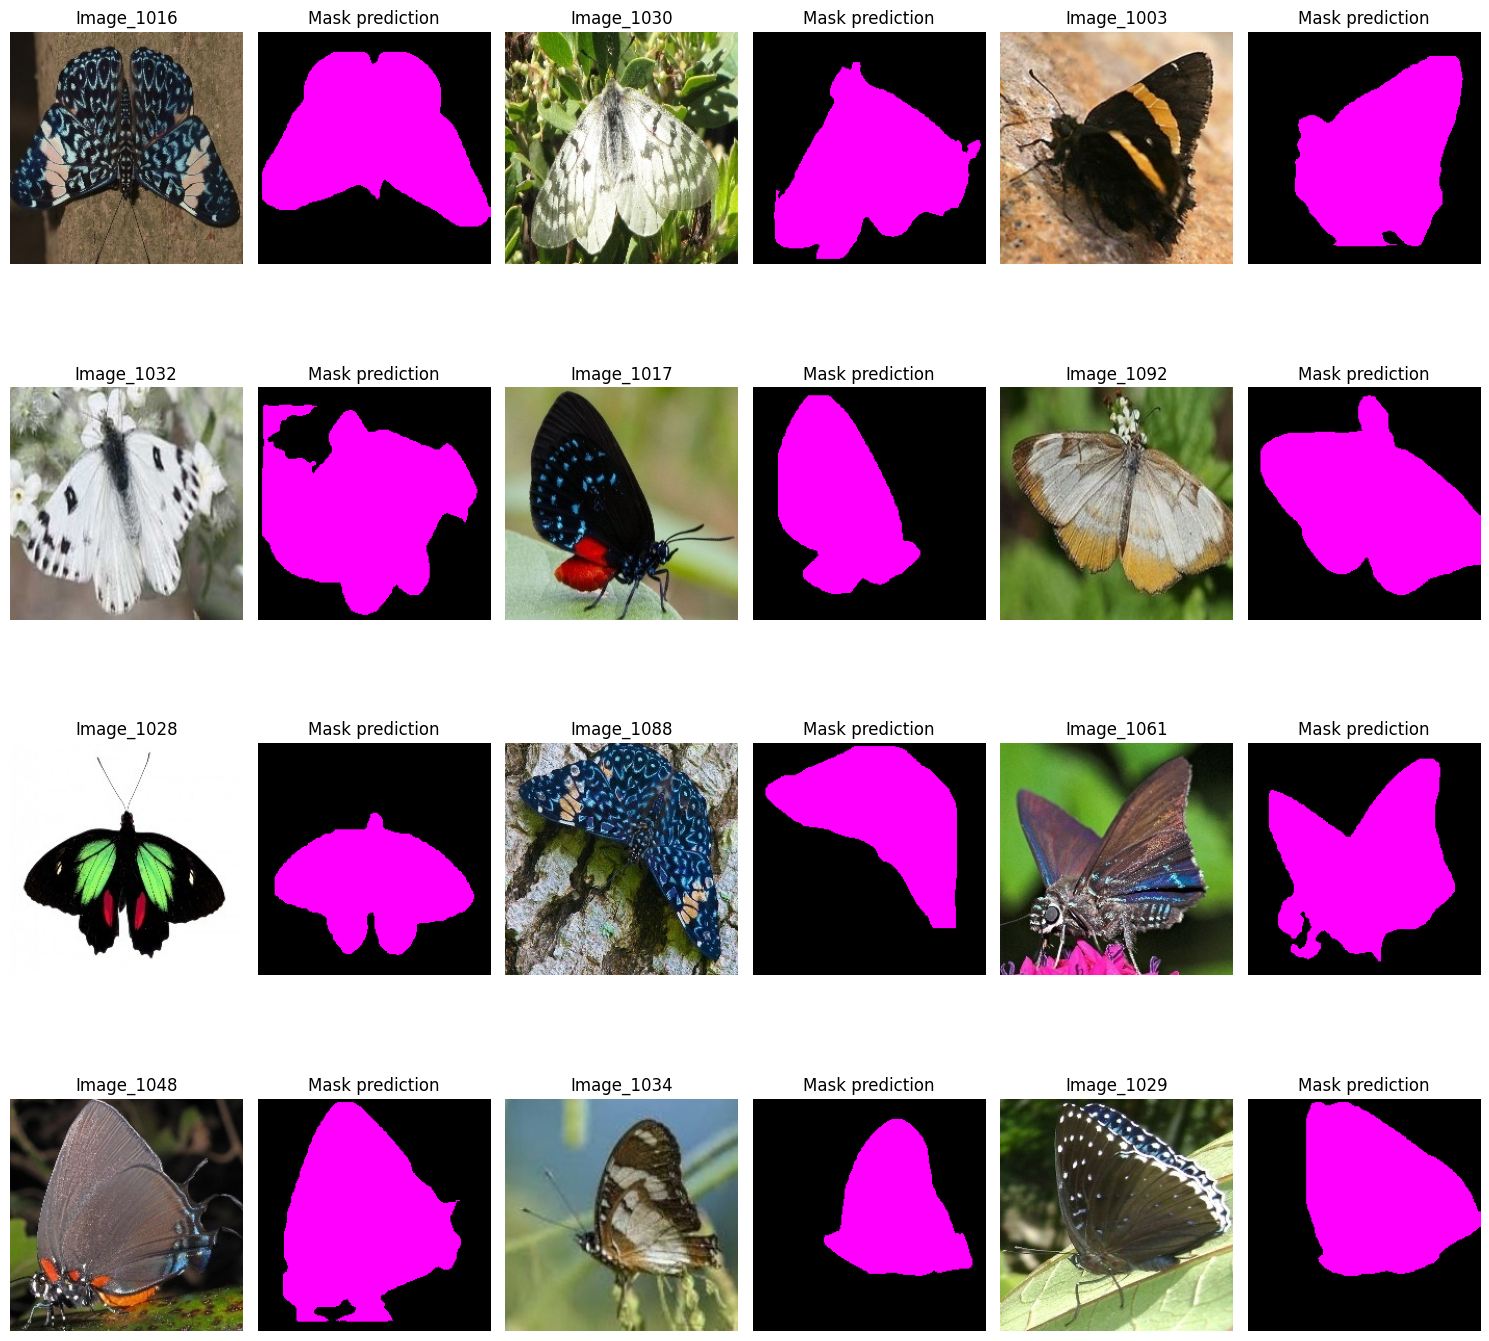

In [101]:
path = "./test"
images = os.listdir(path)
nombre_images = 12
rd = [random.randint(0, 99) for _ in range(nombre_images)]
images_selectionnees = [images[i] for i in rd]

Visualization(images_abs_path = [os.path.join(path,images_selectionnees[i]) for i in range(len(rd))],
              predictions = True)